# A Full Analysis

In this exercise we will try to predict the price of wine given various information. This data is taken from Kaggle at https://www.kaggle.com/zynicide/wine-reviews/data, and originally scraped from WineEnthusiast.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv(open('Files/wine.csv'))
data

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


There's a lot of information here, but let's just use two items right now. We'll look at the number of points WineEnthusiast rated a wine and try to guess the price.

In [12]:
skimmed_data = data[['points', 'price']]
skimmed_data

,points,price
0,87,NaN
1,87,15.0
2,87,14.0
3,87,13.0
4,87,65.0
5,87,15.0
6,87,16.0
7,87,24.0
8,87,12.0
9,87,27.0


There are some wines where the price is not available ('NaN'). We'll need to remove these from the data.

In [15]:
skimmed_data = skimmed_data[np.isfinite(skimmed_data['price'])]

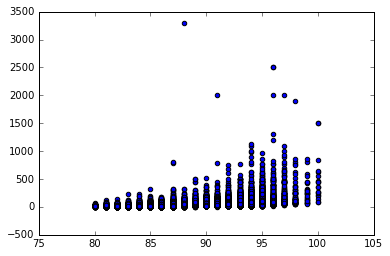

In [16]:
plt.scatter(skimmed_data['points'], skimmed_data['price'])

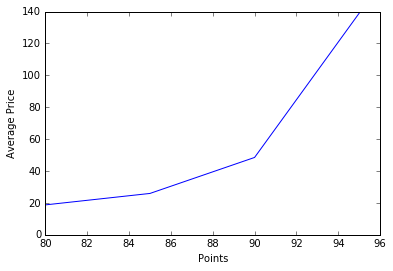

In [19]:
from scipy.stats import binned_statistic
binned_average_price = binned_statistic(skimmed_data['points'], skimmed_data['price'], bins=20, range=(0,100)).statistic
plt.plot(np.arange(0,100,5), binned_average_price)
plt.xlabel("Points")
plt.ylabel("Average Price")

In general, it seems like higher points are correlated with higher price, but the relationship is not super strong. Let's try training a linear regressor using gradient descent.

## Sk-learn

Instead of coding our own gradient descent algorithm, we'll use a package called scikit-learn. This package can do very useful things such as splitting data into training and test sets, performing gradient descent, and performing analysis.

Here we have sklearn use stochastic gradient descent (SGD) to solve a linear regression problem.

In [47]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

In [48]:
X = skimmed_data['points'].values.reshape(-1,1)
y = skimmed_data['price'].values.reshape(-1,1).ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [106]:
n_train = len(X_train)
def generator(batch_size, epochs):
    marker = 0
    while marker <= n_train*epochs:
        begin_marker = marker % n_train
        end_marker = (marker + batch_size) % n_train
        if (begin_marker < end_marker):
            X_batch = X_train[begin_marker:end_marker]
            y_batch = y_train[begin_marker:end_marker]
        else:
            X_batch = np.append(X_train[begin_marker:n_train], X_train[:end_marker])
            y_batch = np.append(y_train[begin_marker:n_train], y_train[:end_marker])
        yield X_batch.reshape(-1,1), y_batch.reshape(-1,1).ravel()
        marker += batch_size

model = SGDRegressor(loss='squared_loss', penalty='none', learning_rate='constant', eta0=0.00001)
train_loss_history = []
test_loss_history = []
for X_batch, y_batch in generator(batch_size=10000, epochs=10):
    model.partial_fit(X_batch, y_batch)
    y_train_predicted = model.predict(X_train)
    y_test_predicted = model.predict(X_test)
    train_loss_history.append(mean_squared_error(y_train_predicted, y_train))
    test_loss_history.append(mean_squared_error(y_test_predicted, y_test))

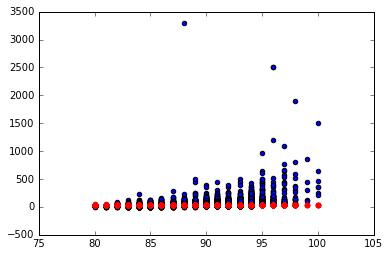

In [107]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_test_predicted, color='red')

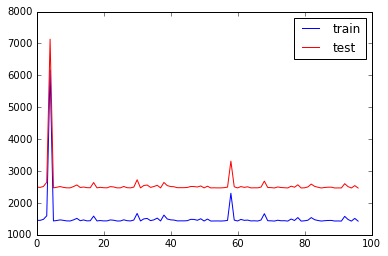

In [108]:
plt.plot(train_loss_history, label='train')
plt.plot(test_loss_history, color='red', label='test')
#plt.yscale('log')
plt.legend()